# Yield Plane

With the phonon and charge resolution we can, in principle, predict the distribution in the yield plane for a standard iZIP-type detector.  

In [1]:
import numpy as np
import resfuncRead as rfr

#read the files
ptres = rfr.getRFunc('data/jardin_ptres.txt')
qres = rfr.getRFunc('data/jardin_qsummaxres.txt')

print(ptres)
print(qres)

{1: {'sqrt': array([1.55393e-01, 6.91325e-02, 9.60343e-11, 8.85466e-03, 5.06287e-04,
       3.06120e-05]), 'lin': array([1.25107e-01, 5.43520e-02, 2.23536e-02, 7.08365e-04, 1.00000e+00,
       1.00000e+00])}, 2: {'sqrt': array([8.20990e-02, 1.38586e-04, 1.08455e-02, 1.83727e-03, 0.00000e+00,
       2.22402e-06]), 'lin': array([2.86871e-01, 2.28222e-04, 5.45559e-03, 9.12482e-04, 1.00000e+00,
       1.00000e+00])}, 3: {'sqrt': array([8.46805e-02, 1.18728e-04, 4.71845e-10, 1.08038e-02, 7.02979e-04,
       3.19490e-05]), 'lin': array([2.90271e-01, 2.04817e-04, 2.57054e-02, 6.00452e-04, 1.00000e+00,
       1.00000e+00])}, 4: {'sqrt': array([3.28312e-02, 5.00053e-05, 1.00053e-02, 2.80728e-04, 2.44885e-04,
       6.96688e-06]), 'lin': array([1.81162e-01, 1.37979e-04, 1.78957e-02, 1.32698e-04, 1.00000e+00,
       1.00000e+00])}, 5: {'sqrt': array([4.11937e-02, 6.97124e-05, 5.49462e-04, 1.08870e-03, 3.61038e-04,
       2.63019e-05]), 'lin': array([2.02544e-01, 1.55751e-04, 1.64610e-02, 5.20127e

In [2]:
#make the resolution functions
fpt = rfr.makeFunc(ptres[1]['sqrt'])
fq = rfr.makeFunc(qres[1]['lin'],True)
fptv = np.vectorize(fpt)
fqv = np.vectorize(fq)

In [3]:
#start generating stuff

N = 10000
V = 8
eps = 3.3 #eV per pair in Ge

Eer = np.random.uniform(0,200,N)

print(np.shape(Eer))
print(Eer[0:100])

(10000,)
[ 94.69169698 148.59955843 181.57245365 102.48900728 132.6262214
 166.56242062 125.99695585 186.41789401 107.934288   186.26376781
 122.580207   170.92098766 162.10455849 192.7451542   27.69724978
  38.87320359  85.01766472  50.37515514  32.43892767 165.9142494
  40.72033841 197.51557343  58.52929138 150.14260071 104.8418401
 185.58574757 182.3473728   85.00855795  52.20215942 100.04086441
  94.48091837  35.94746359  96.82769301   5.18251599 195.99250494
  35.62180822  94.23014659 136.11158805  98.98560797  52.66445507
  37.64076387 180.59774601 175.48901211  56.62503215  89.26976122
   9.30485596 103.07107634 165.84526508 151.97519185  38.99893221
  96.16993398   4.94370809 129.6173916   20.29844894  87.54361843
 119.89891421 139.49124803 199.08381378  67.5804659   53.55086767
 174.9601395   73.18278142  76.36938277 136.86292085  69.62564446
 163.97396331 183.01467262  63.18993973 155.28082066 134.15641398
 163.61243459 101.52598757 124.1112168  198.53389219  48.39553905
  22

In [4]:
Pter = (1+(V/eps))*Eer 
Pter = Pter + np.random.normal(0.0,fptv(Pter))
Qer = Eer
Qer = Qer + np.random.normal(0.0,fqv(Qer))

Erer = Pter - (V/eps)*Qer
Yer = Qer/Erer


In [5]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

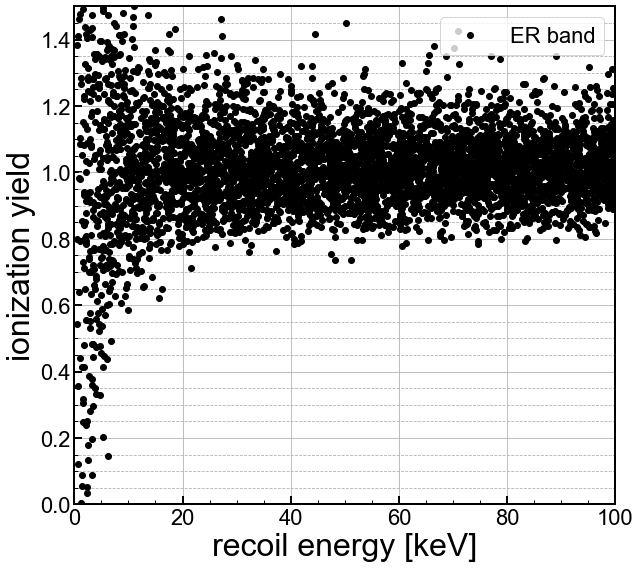

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



ax1.plot(Erer,Yer,'o',color='k', label='ER band')

#ax1.plot(X,gaus(X,*fitpars[idx]),'k-',label='fit (standard)')



#ax1.axvline(t(t_test[idx]), color='k', linestyle='-', lw=2, alpha=0.8,label=None)


ymin = 0
ymax = 1.5



ax1.set_yscale('linear')
#ax1.set_yscale('linear')
ax1.set_xlim(0, 100) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures.png')
plt.show()